In [2]:
import pandas as pd

In [3]:
credit_data=pd.read_excel("default of credit card clients.xls", header=1, index_col=None, )

In [4]:
credit_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
credit_data.count()

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

In [6]:
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
output="default payment next month"

In [8]:
cols=[f for f in credit_data.columns if credit_data.dtypes[f]!='object']

In [9]:
len(cols)

25

In [10]:
cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [11]:
cols.remove("ID")

In [12]:
cols.remove(output)

In [13]:
print(cols)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [14]:
f=pd.melt(credit_data, id_vars=output, value_vars=cols)

In [15]:
f.tail()

,default payment next month,variable,value
689995,0,PAY_AMT6,1000
689996,0,PAY_AMT6,0
689997,1,PAY_AMT6,3100
689998,1,PAY_AMT6,1804
689999,1,PAY_AMT6,1000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

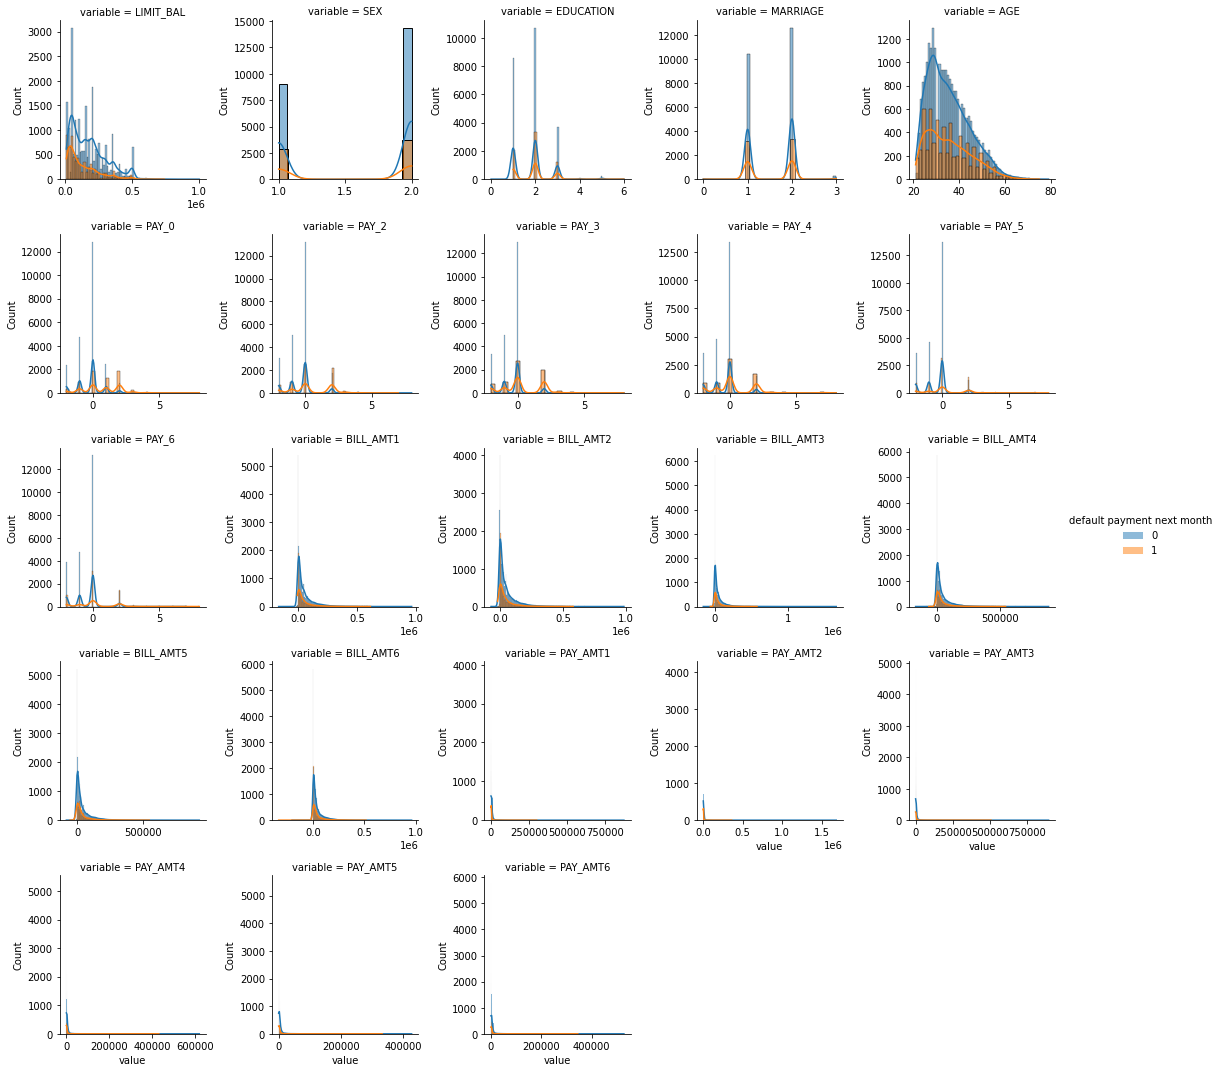

In [17]:
g=sns.FacetGrid(f, hue=output, col='variable', col_wrap=5, sharex=False, sharey=False)
g=g.map(sns.histplot, "value", kde=True).add_legend()

In [18]:
credit_data['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [19]:
import numpy as np
import scipy.stats as stats

In [20]:
def ChiSquaredTestOfIndependence(df, inputVar, Outcome_Category):
  Outcome_Category_Table = df.groupby(Outcome_Category)[Outcome_Category].count().values
  Outcome_Category_Ratios = Outcome_Category_Table/ sum(Outcome_Category_Table)
  possibleVals = df[inputVar].unique()
  observed=[]
  expected=[]
  for possible in possibleVals:
    countsInCategories = df[ df[inputVar] == possible].groupby(Outcome_Category)[Outcome_Category].count().values
    if (len(countsInCategories) != len(Outcome_Category_Ratios) ):
      print("Error ! The class" +str(possible) + "of  \'" + inputVar + "\' does not contain all values of \'" + Outcome_Category + "\'")
      return 
    elif (min(countsInCategories) < 5):
      print("Chi square test needs atleast 5 observation in each cell")
      print(inputVar + "=" + str(possible) + "has insufficient Data")
      print(countsInCategories)
      return
    else:
      observed.append(countsInCategories)
      expected.append(Outcome_Category_Ratios * len(df[df[inputVar] == possible]))
  observed = np.array(observed)
  expected = np.array(expected)
  chi_squared_stat = ((observed - expected)**2 / expected).sum().sum()
  degOfF = (observed.shape[0] - 1) * (observed.shape[1] - 1)
  #crit = stats.chi2.ppf(q = 0.95,df = degOfF)
  p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = degOfF)
  print("Calculated test-statistics is %0.2f" % chi_squared_stat)
  print("If" + Outcome_Category + "is indep of" + inputVar + ", this has probability %.2e of occuring" % p_value)

    

In [21]:
ChiSquaredTestOfIndependence(credit_data, "SEX", output)

Calculated test-statistics is 47.91
Ifdefault payment next monthis indep ofSEX, this has probability 4.47e-12 of occuring


In [22]:
ChiSquaredTestOfIndependence(credit_data, "EDUCATION", output)

Error ! The class0of  'EDUCATION' does not contain all values of 'default payment next month'


In [23]:
print( "We have %d with EDUCATION = 0" % len(credit_data.loc[credit_data["EDUCATION"] == 0]))
print( "We have %d with EDUCATION = 4" % len(credit_data.loc[credit_data["EDUCATION"] == 4]))
print( "We have %d with EDUCATION = 5" % len(credit_data.loc[credit_data["EDUCATION"] == 5]))
print( "We have %d with EDUCATION = 6" % len(credit_data.loc[credit_data["EDUCATION"] == 6]))

We have 14 with EDUCATION = 0
We have 123 with EDUCATION = 4
We have 280 with EDUCATION = 5
We have 51 with EDUCATION = 6


In [24]:
# Since we have 30k samples, let's just put these non-typical Education instances all into the EDUCATION=4 class and continue 
credit_data["EDUCATION_Corr"] = credit_data["EDUCATION"].apply(lambda x: x if ((x>0) and (x<4)) else 4)

In [25]:
ChiSquaredTestOfIndependence ( credit_data, "EDUCATION_Corr", output)

Calculated test-statistics is 160.41
Ifdefault payment next monthis indep ofEDUCATION_Corr, this has probability 0.00e+00 of occuring


In [26]:
cols.remove("EDUCATION")
cols.append("EDUCATION_Corr")

In [27]:
ChiSquaredTestOfIndependence (credit_data, "MARRIAGE", output)

Calculated test-statistics is 35.66
Ifdefault payment next monthis indep ofMARRIAGE, this has probability 8.83e-08 of occuring


In [28]:
##separate the variables into "quantitative" vs "qualitative"

In [29]:
quant=['LIMIT_BAL','AGE']

In [30]:
qual_enc=cols
qual_enc.remove("LIMIT_BAL")
qual_enc.remove("AGE")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

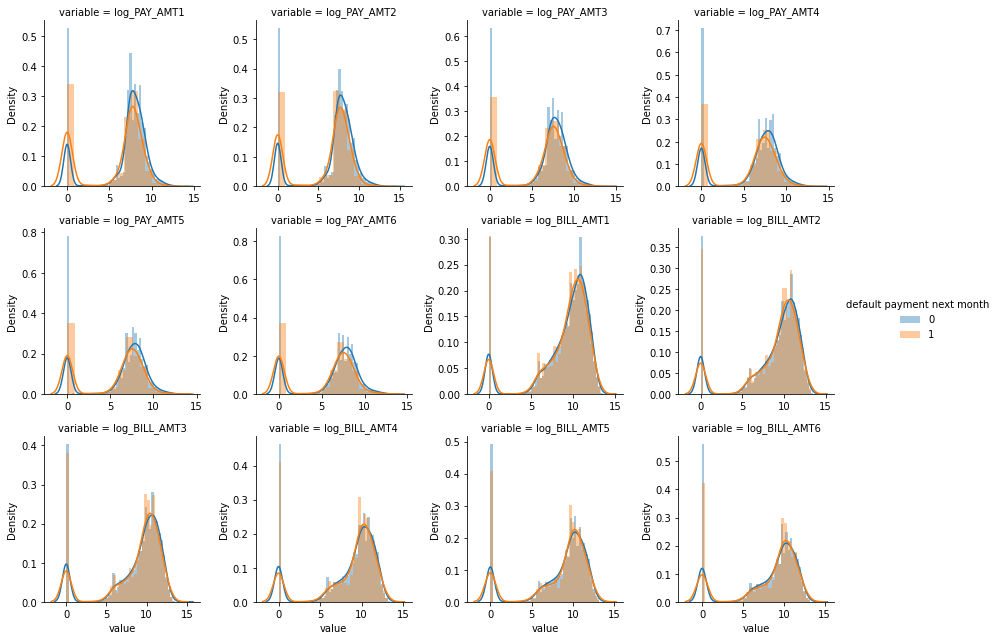

In [31]:
logged = []
for ii in range(1,7):
  qual_enc.remove("PAY_AMT" + str(ii))
  credit_data["log_PAY_AMT" + str(ii)] = credit_data["PAY_AMT"+ str(ii)].apply(lambda x: np.log1p(x) if (x>0) else 0)
  logged.append("log_PAY_AMT" + str(ii))

for ii in range(1,7):
  qual_enc.remove("BILL_AMT" + str(ii))
  credit_data["log_BILL_AMT" + str(ii)] = credit_data["BILL_AMT" + str(ii)].apply(lambda x: np.log1p(x) if (x>0) else 0)
  logged.append("log_BILL_AMT" + str(ii))

f=pd.melt(credit_data, id_vars=output, value_vars=logged)
g = sns.FacetGrid(f, hue = output, col = "variable", col_wrap = 4, sharex = False, sharey = False)
g = g.map( sns.distplot, 'value', kde = True).add_legend()

It looks like higher Log PAY_AMT is associated with slightly less default.

So now we have quant variables, qual_Enc variables and logged variables. Let's check correlations with the output variable:

In [35]:
features = quant + qual_enc + logged + [output]

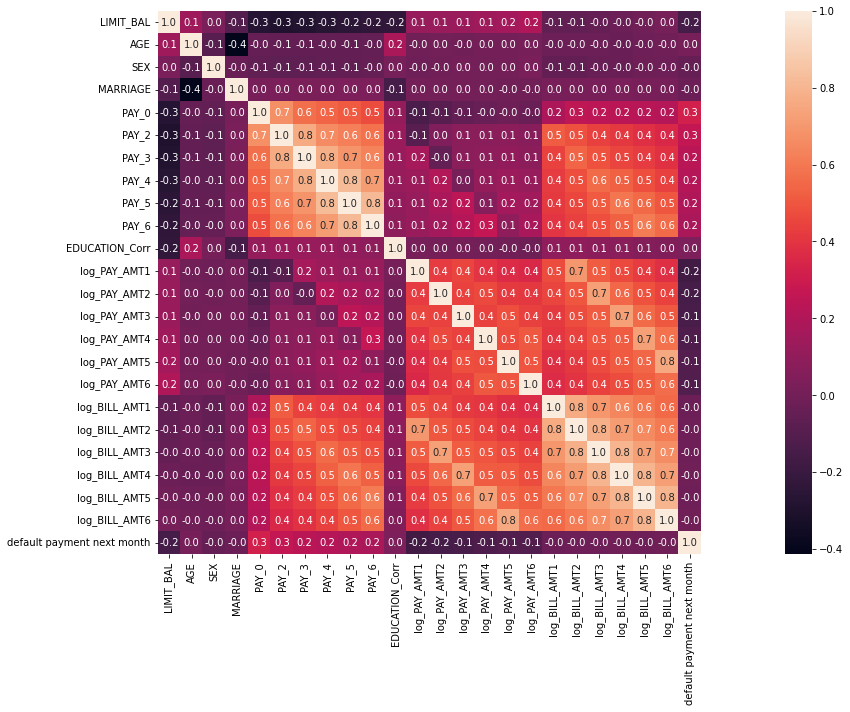

In [36]:
corr = credit_data[features].corr()
plt.subplots( figsize = (30,10))
sns.heatmap(corr, square = True, annot = True, fmt = ".1f")

In [37]:
features = quant + qual_enc + logged
X = credit_data[features].values
Y = credit_data[output].values



In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [39]:
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)

In [41]:

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( n_estimators = 10)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix (Y_test, y_pred)
print(cm)



[[4459  264]
 [ 834  443]]


In [44]:
scoreRF= cross_val_score(classifier, X_train, Y_train, )
print( "The cross validation accuracy %.2f and  with std %0.2d, " %(scoreRF.mean(), scoreRF.std()))

The cross validation accuracy 0.80 and  with std 00, 


In [46]:
#-------------- 
# kernel SVM 
#--------------
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf")
classifier1.fit( X_train, Y_train )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( Y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresSVC = cross_val_score( classifier1, X_train, Y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

Accuracy on Test Set for kernel-SVM = 0.83


KeyboardInterrupt: ignored